In [25]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import os
import re

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print( device )

cuda


In [26]:
path = os.path.expanduser( '~/SimCLR/runs/Apr13_14-18-24_j-leelab1.mae.ncsu.edu/checkpoint_0200.pth.tar' )
checkpoint = torch.load(path, map_location=device)
state_dict = checkpoint['state_dict']

# Model: ResNet18 !
model = torchvision.models.resnet18(pretrained=False, num_classes=10).to(device)
model.eval()

/home/hjang4/anaconda3/envs/simclr/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/hjang4/anaconda3/envs/simclr/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

Parsed epochs: [0, 1, 2, 3, 4]
Parsed losses: [4.406802177429199, 3.0175161361694336, 2.604074716567993, 2.2647151947021484, 2.0555167198181152]
Parsed Top1 Accuracies: [18.9453125, 38.671875, 47.65625, 57.8125, 59.9609375]


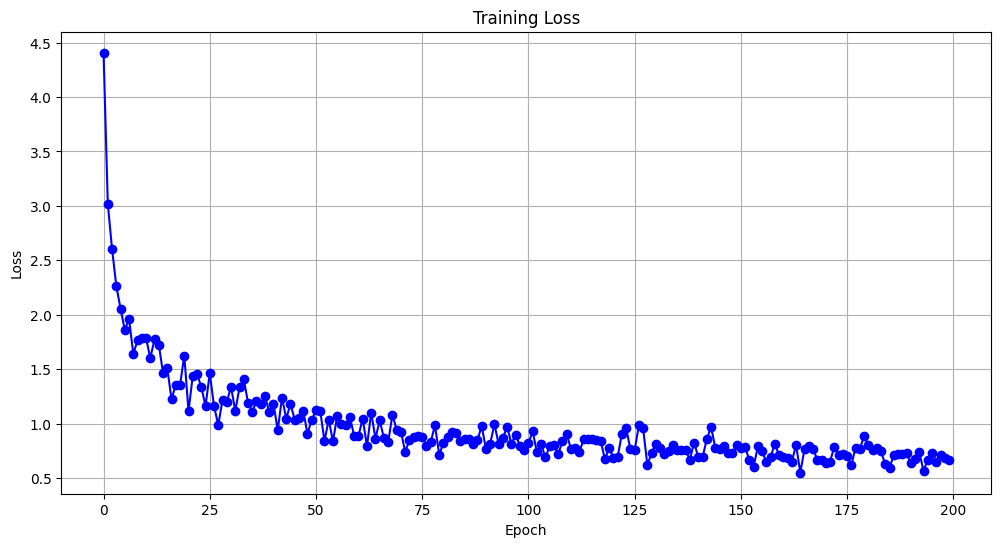

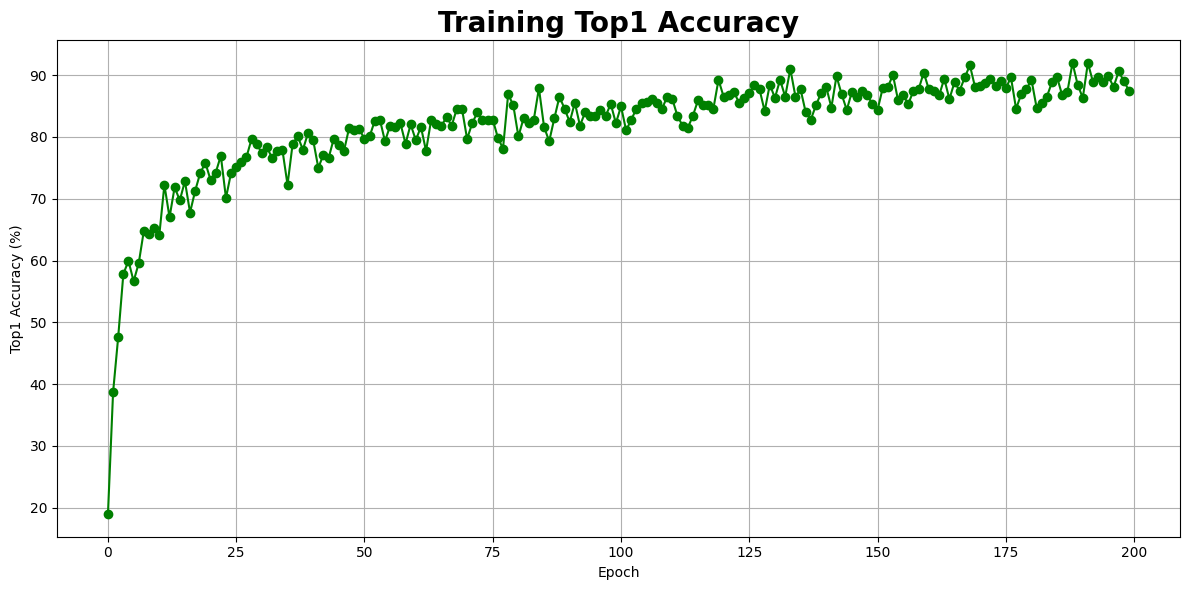

In [ ]:
# Observe ResNet-18 training process

log_file_path = os.path.expanduser( '~/SimCLR/runs/Apr13_14-18-24_j-leelab1.mae.ncsu.edu/training.log' )

epochs = []
losses = []
top1_accuracy = []

pattern = r"Epoch:\s*(\d+)\s+Loss:\s*([\d.]+)\s+Top1 accuracy:\s*([\d.]+)"

with open(log_file_path, 'r') as f:
    for line in f:
        match = re.search(pattern, line)
        if match:
            epoch = int(match.group(1))
            loss  = float(match.group(2))
            acc   = float(match.group(3))
            epochs.append(epoch)
            losses.append(loss)
            top1_accuracy.append(acc)

print("Parsed epochs:", epochs[:5])
print("Parsed losses:", losses[:5])
print("Parsed Top1 Accuracies:", top1_accuracy[:5])

plt.figure(figsize=(12, 6))
plt.plot(epochs, losses, marker='o', linestyle='-', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss', fontsize=20, fontweight='bold')
plt.grid(True)
# plt.savefig('Encoder Training Loss.jpg')

plt.figure(figsize=(12, 6))
plt.plot(epochs, top1_accuracy, marker='o', linestyle='-', color='green')
plt.xlabel('Epoch')
plt.ylabel('Top1 Accuracy (%)')
plt.title('Training Top1 Accuracy', fontsize=20, fontweight='bold')
plt.grid(True)
# plt.savefig('Encoder Training Top1 Accuracy.jpg')

plt.tight_layout()
plt.show()

Parsed epochs: [0, 1, 2, 3, 4]
Parsed Top1 Train Accuracies: [17.74241828918457, 38.49494552612305, 50.41015625, 57.27596664428711, 60.43083572387695]
Parsed Top1 Test Accuracies: [30.16357421875, 45.1611328125, 54.22119140625, 58.86962890625, 61.73828125]
Parsed Top5 Test Accuracies: [82.36083984375, 92.75390625, 95.20751953125, 96.47216796875, 97.080078125]


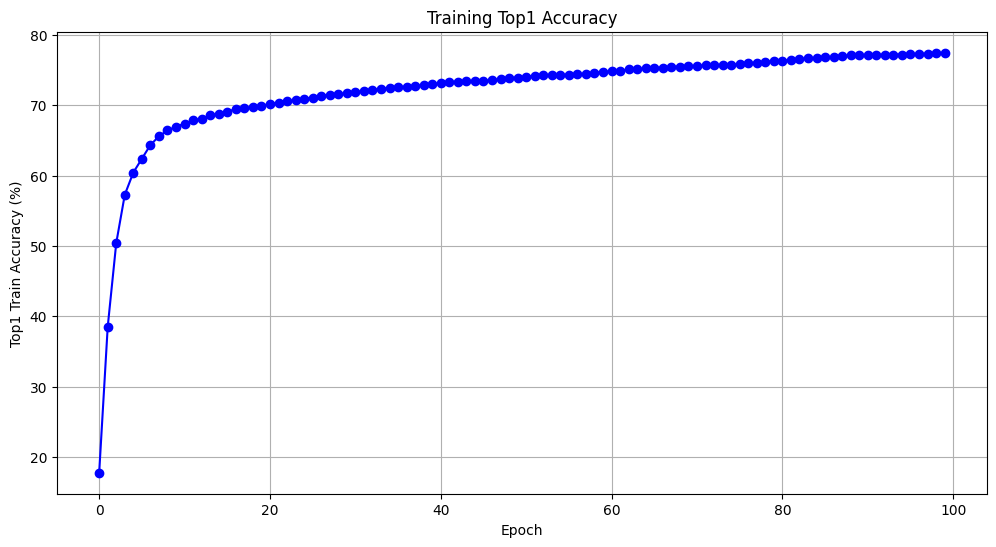

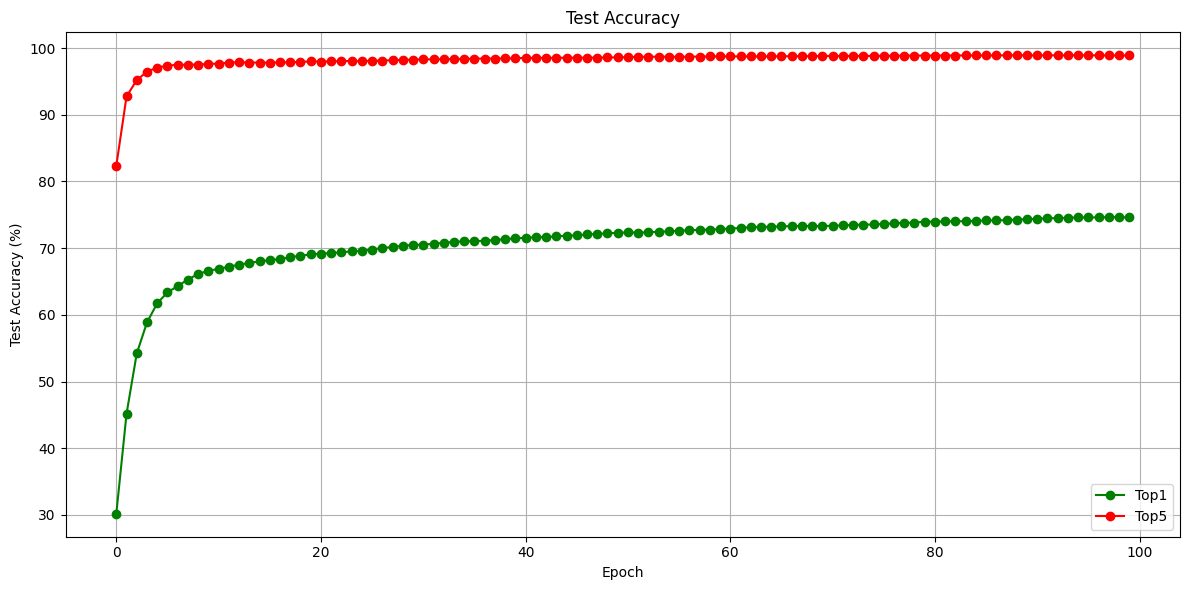

In [ ]:
ev_log_file_path = os.path.expanduser( '~/SimCLR/evaluator_log.log' )

epochs = []
top1_train = []
top1_test = []
top5_test = []

pattern = r"Epoch\s+(\d+)\s+Top1 Train accuracy\s+([\d\.]+)\s+Top1 Test accuracy:\s+([\d\.]+)\s+Top5 test acc:\s+([\d\.]+)"

with open(ev_log_file_path, 'r') as f:
    for line in f:
        match = re.search(pattern, line)
        if match:
            epoch = int(match.group(1))
            train_acc = float(match.group(2))
            test_acc = float(match.group(3))
            test5_acc = float(match.group(4))
            epochs.append(epoch)
            top1_train.append(train_acc)
            top1_test.append(test_acc)
            top5_test.append(test5_acc)

print("Parsed epochs:", epochs[:5])
print("Parsed Top1 Train Accuracies:", top1_train[:5])
print("Parsed Top1 Test Accuracies:", top1_test[:5])
print("Parsed Top5 Test Accuracies:", top5_test[:5])


plt.figure(figsize=(12, 6))
plt.plot(epochs, top1_train, marker='o', linestyle='-', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Top1 Train Accuracy (%)')
plt.title('Training Top1 Accuracy', fontsize=20, fontweight='bold')
plt.grid(True)
# plt.savefig('Evaluator Training Top1 Accuracy.jpg')

plt.figure(figsize=(12, 6))
plt.plot(epochs, top1_test, marker='o', linestyle='-', color='green')
plt.plot(epochs, top5_test, marker='o', linestyle='-', color='red')
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy (%)')
plt.title('Test Accuracy', fontsize=20, fontweight='bold')
plt.legend( ['Top1', 'Top5'] )
plt.grid(True)
# plt.savefig('Evaluator Test Top1 Top5 Accuracy.jpg')

plt.tight_layout()
plt.show()

In [ ]:
# Eliminate base fc layer ... feature extractor, f(.)
feature_extractor = torch.nn.Sequential(*list(model.children())[:-1])
feature_extractor.to(device)
feature_extractor.eval()

dataset_path = os.path.expanduser( '~/SimCLR/datasets' )
stl10_test = torchvision.datasets.STL10(root=dataset_path, split='test', download=False, transform=transforms.ToTensor())

# 10 samples with different labels from STL10 test dataset
unique_indices = {}
for idx in range(len(stl10_test)):
    # stl10_test[idx] returns (image, label)
    _, label = stl10_test[idx]
    if label not in unique_indices:
        unique_indices[label] = idx
    if len(unique_indices) == 10: 
        break
indices = [unique_indices[label] for label in sorted(unique_indices.keys())]
subset = torch.utils.data.Subset(stl10_test, indices)
subset_loader = torch.utils.data.DataLoader(subset, batch_size=10, shuffle=False)

images, labels = next(iter(subset_loader))
images = images.to(device)
print(indices)

[3, 5, 24, 4, 8, 2, 0, 1, 55, 17]


In [13]:
# Representation vector calculated from feature_extractor, ResNet18 (avgpool + flatten)
with torch.no_grad():
    features = feature_extractor(images)  # shape: (batch, feature_dim, 1, 1)
    features = features.view(features.size(0), -1)  # shape: (batch, feature_dim)
print(features.shape)

# L2 norm
features_norm = features / features.norm(dim=1, keepdim=True)

# cosine similarity matrix
cosine_sim_model = features_norm @ features_norm.t()
cosine_sim_model = cosine_sim_model.cpu().numpy()

torch.Size([10, 512])


TypeError: FigureCanvasAgg.print_jpg() got an unexpected keyword argument 'fontsize'

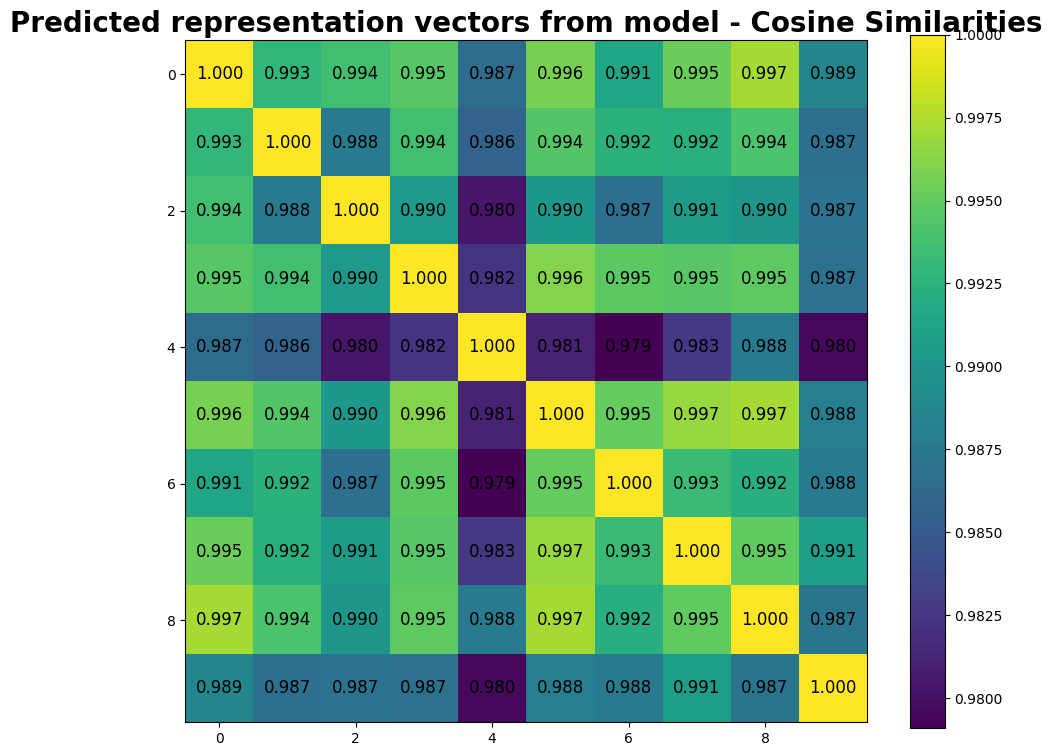

In [ ]:
# Visualization
plt.figure(figsize=(11, 9))
plt.imshow(cosine_sim_model, cmap='viridis')
plt.colorbar()
plt.title('Predicted representation vectors from model - Cosine Similarities', fontsize=20, fontweight='bold')

for i in range(cosine_sim_model.shape[0]):
    for j in range(cosine_sim_model.shape[1]):
        plt.text(j, i, f"{cosine_sim_model[i, j]:.3f}",
                 ha='center', va='center', fontsize=12,
                 color='white' if cosine_sim_model[i, j] < 0.5 else 'black')

# plt.tight_layout()
plt.savefig( 'cosine_similarities_matrix.jpg' )
plt.show()

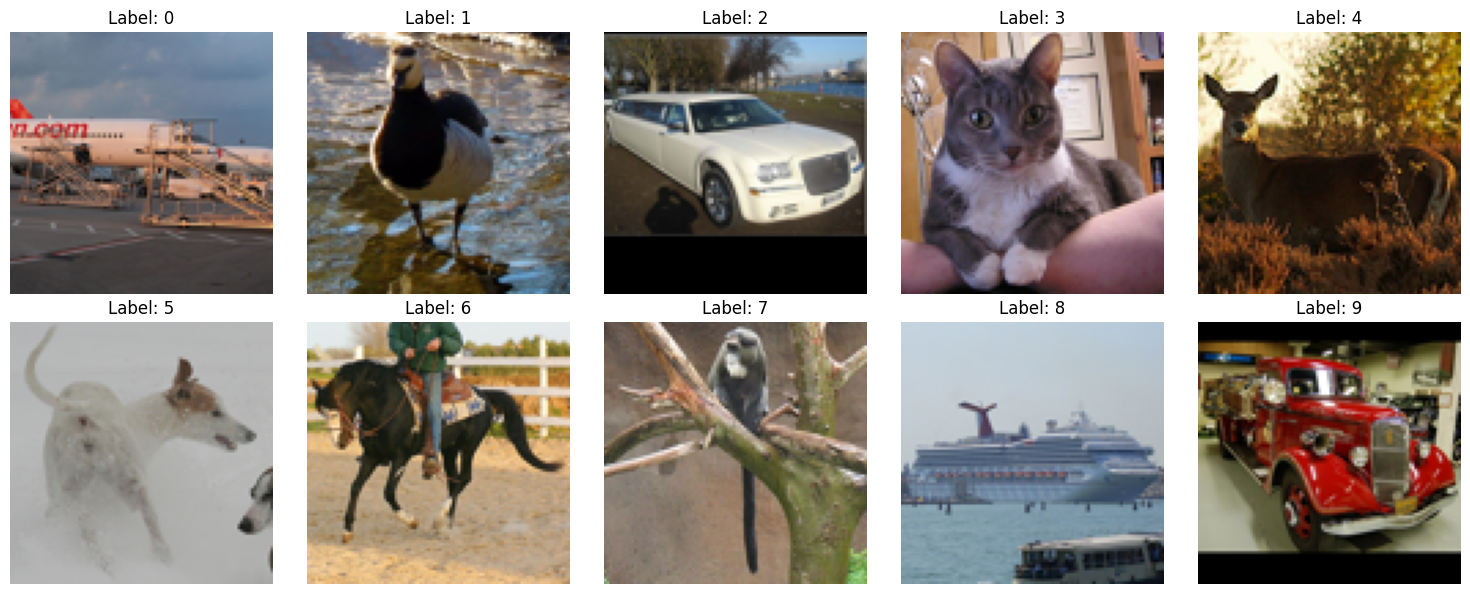

In [ ]:
plt.figure(figsize=(15, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    img = images[i].cpu().permute(1, 2, 0).numpy()
    plt.imshow(img)
    plt.title(f"Label: {labels[i].item()}")
    plt.axis('off')
plt.tight_layout()
plt.savefig( 'example_images.jpg' )
plt.show()

In [14]:
d = (features[1, :] - features[8, :])  # Vector difference between 'Bird' & 'Ship'
print(d)
print(d.norm())

tensor([-1.6776e-01, -1.1236e-01, -6.1460e-02, -1.1271e-01, -9.3758e-02,
        -1.9113e-01, -2.8464e-01, -1.0112e-01,  0.0000e+00, -3.8373e-02,
        -5.6652e-01, -1.2792e-01, -1.4937e-01, -1.6891e-01, -1.7807e-01,
        -1.4003e-01, -2.3849e-01, -1.8034e-01, -4.1150e-01, -3.1841e-01,
        -2.1604e-01, -1.4712e-01, -9.2961e-02, -2.8462e-02, -1.5742e-01,
        -7.0389e-02, -1.6817e-02, -9.3664e-02, -9.4171e-02, -4.9063e-02,
        -8.3775e-03, -1.2164e-02, -1.3555e-01, -2.7749e-01, -1.8063e-02,
         2.4942e-02, -2.0262e-02, -5.2026e-02, -3.8244e-02, -6.7134e-02,
        -2.2667e-02, -8.4301e-02, -1.6746e-01, -4.2779e-01, -8.3544e-02,
        -4.2023e-01, -1.1642e-01, -2.6665e-01,  0.0000e+00, -5.5402e-02,
        -2.5288e-01, -1.3694e-01, -2.7328e-01, -1.3395e-01, -1.3705e-02,
        -4.7582e-02, -4.5181e-02, -1.4208e-01, -5.3294e-01, -1.7346e-01,
        -1.5185e-01, -1.2839e-01, -7.3178e-02,  0.0000e+00, -8.9415e-02,
        -4.5643e-02, -6.5411e-02, -1.4191e-01, -1.2